In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns



2025-01-31 00:02:33.925908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738278153.948066  663503 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738278153.954707  663503 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-31 00:02:33.984552: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define image paths (Update these paths to your actual image locations)
image_paths = ["class1.jpg", "class2.jpg", "class3.jpg"]



In [3]:
# Load and preprocess images
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize
    return img_array



In [4]:
# Create dataset
X = np.array([load_and_preprocess_image(img, (128, 128)) for img in image_paths])
y = np.array([0, 1, 2])  # Assuming labels class1=0, class2=1, class3=2



In [5]:
# Data Augmentation
data_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.2, height_shift_range=0.2, 
                              shear_range=0.2, zoom_range=0.2, horizontal_flip=True)


In [6]:
# Define a Simple CNN Model
def create_cnn_model(input_shape=(128, 128, 3)):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [10]:
from sklearn.model_selection import train_test_split

# Split dataset manually
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Generate augmented data for training
train_generator = data_gen.flow(X_train, y_train, batch_size=4)
val_generator = data_gen.flow(X_val, y_val, batch_size=4)

# Train CNN Model
history = model.fit(train_generator, validation_data=val_generator, epochs=20, callbacks=[early_stop])


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5000 - loss: 0.4149 - val_accuracy: 0.0000e+00 - val_loss: 9.3661
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.5000 - loss: 1.8908 - val_accuracy: 0.0000e+00 - val_loss: 10.6519
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.5000 - loss: 3.3260 - val_accuracy: 0.0000e+00 - val_loss: 9.9126
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5000 - loss: 0.8540 - val_accuracy: 0.0000e+00 - val_loss: 8.7693
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.0000e+00 - loss: 1.3659 - val_accuracy: 0.0000e+00 - val_loss: 7.4125


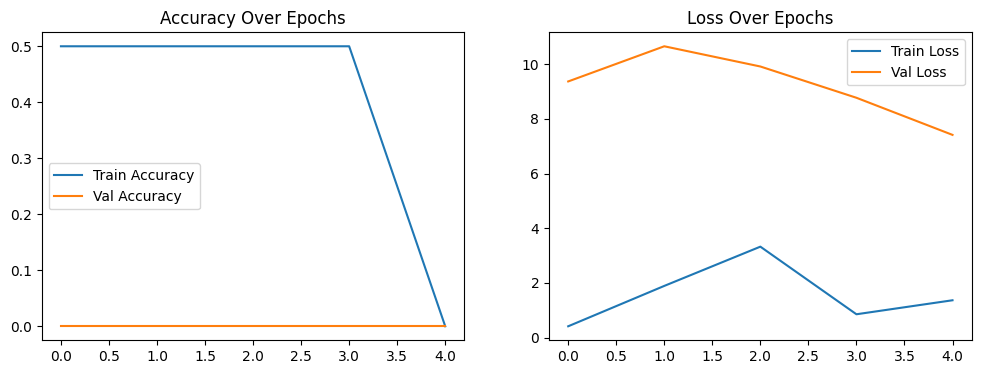

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


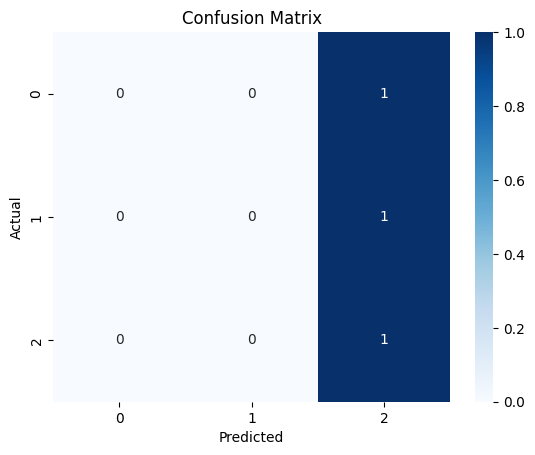

              precision    recall  f1-score   support

      Class1       0.00      0.00      0.00         1
      Class2       0.00      0.00      0.00         1
      Class3       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



/home/sachin.rangaswam/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sachin.rangaswam/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sachin.rangaswam/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [11]:
# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Loss Over Epochs')
    plt.show()

plot_history(history)

# Evaluate and Display Confusion Matrix
y_pred = np.argmax(model.predict(X), axis=1)
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print(classification_report(y, y_pred, target_names=['Class1', 'Class2', 'Class3']))


Poor performance, oops!

In [12]:
data_gen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')

augmented_data = []
augmented_labels = []

for _ in range(100):  # Create 100 variations per image
    for i, img_path in enumerate(image_paths):
        img = load_and_preprocess_image(img_path, target_size=(128, 128))
        augmented_data.append(img)
        augmented_labels.append(i)

X = np.array(augmented_data)
y = np.array(augmented_labels)


In [13]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze pretrained layers

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [16]:


# Load and preprocess images
def load_and_preprocess_image(img_path, target_size=(128, 128)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0  # Normalize
    return img_array


In [17]:

# Data Augmentation to artificially increase dataset size
data_gen = ImageDataGenerator(
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True, 
    fill_mode='nearest')



In [18]:
# Generate augmented data
augmented_data = []
augmented_labels = []

for _ in range(100):  # Create 100 variations per image
    for i, img_path in enumerate(image_paths):
        img = load_and_preprocess_image(img_path, target_size=(128, 128))
        augmented_data.append(img)
        augmented_labels.append(i)

X = np.array(augmented_data)
y = np.array(augmented_labels)

In [19]:
# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Define Transfer Learning Model (VGG16)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze pretrained layers

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [22]:
# Train model with manually split training and validation sets
history = model.fit(data_gen.flow(X_train, y_train, batch_size=8), 
                    validation_data=(X_val, y_val), 
                    epochs=20, 
                    callbacks=[early_stop])


Epoch 1/20


/home/sachin.rangaswam/.local/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.5813 - loss: 1.3822 - val_accuracy: 1.0000 - val_loss: 0.0084
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9390 - loss: 0.1264 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 137ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 1.0000 - val_loss: 6.0095e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 3.1352e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 3.1045e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 3.0364e-04
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9971 - loss: 0.0136 - val_accuracy: 1.0000 - val_loss: 1.5684e-04
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 1.0000 - loss: 0.0024 - val_acc

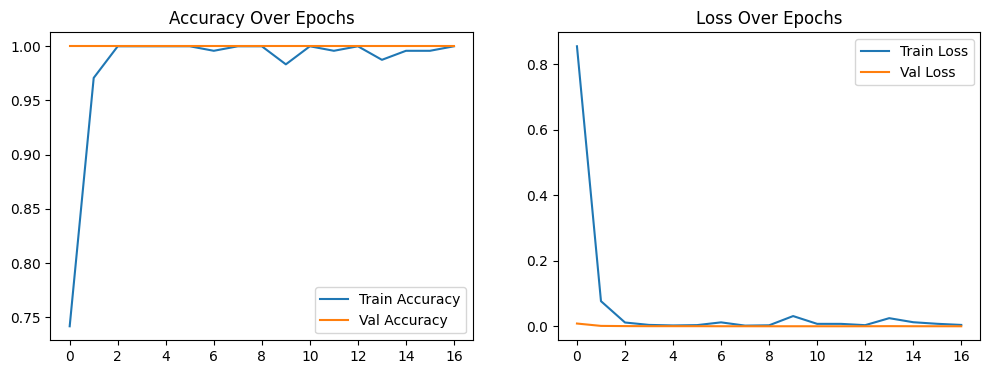

In [24]:
#Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.legend()
    plt.title('Loss Over Epochs')
    plt.show()

plot_history(history)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/stepWARNING:tensorflow:5 out of the last 5 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7f1a7cf2d080> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 442ms/step


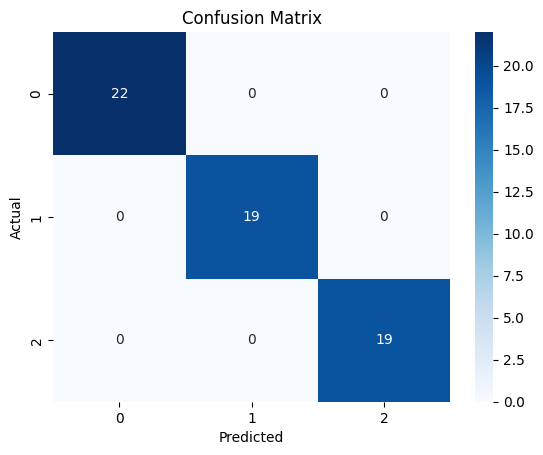

In [25]:
# Evaluate and Display Confusion Matrix
y_pred = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [26]:
# Print Classification Report
print(classification_report(y_val, y_pred, target_names=['Class1', 'Class2', 'Class3']))


              precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        22
      Class2       1.00      1.00      1.00        19
      Class3       1.00      1.00      1.00        19

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

